In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
##Step-2: Required values of input and output 

x_min = 1 # Min of the range of x (feature)

x_max = 15 # Max of the range of x (feature)


In [4]:
# Step-3: Define the functions to be approximated
# Definition of the function without exponential and sinusoidal terms i.e. just the polynomial
def func_poly(x):
    result = x**3
    return (result)



In [5]:
# % Step-4. Linearly Sampled Points 
# Densely spaced points for generating the ideal functional curve
x_smooth = np.array(np.linspace(x_min,x_max,10001))

# Use one of the following
y_smooth = func_poly(x_smooth)




In [6]:
# Step-6 
df = pd.DataFrame(data=x_smooth, columns=['x'])
df['y']=y_smooth
y_min = df['y'].min()
y_max = df['y'].max()
df['y_scaled'] = (df['y'] - y_min) / (y_max - y_min)
df.head()

,x,y,y_scaled
0,1.0000,1.000000,0.000000
1,1.0014,1.004206,0.000001
2,1.0028,1.008424,0.000002
3,1.0042,1.012653,0.000004
4,1.0056,1.016894,0.000005


<Axes: title={'center': 'True process and measured samples\n'}, xlabel='x', ylabel='y'>

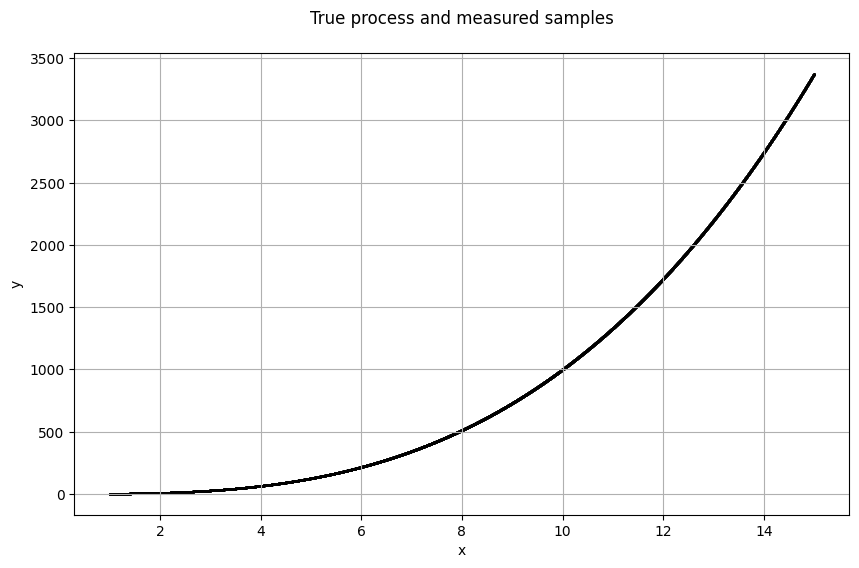

In [7]:

df.plot.scatter('x','y',title='True process and measured samples\n',
                grid=True,edgecolors=(0,0,0),c='orange',s=0.5,figsize=(10,6))


<Axes: title={'center': 'True process and measured samples\n'}, xlabel='x', ylabel='y_scaled'>

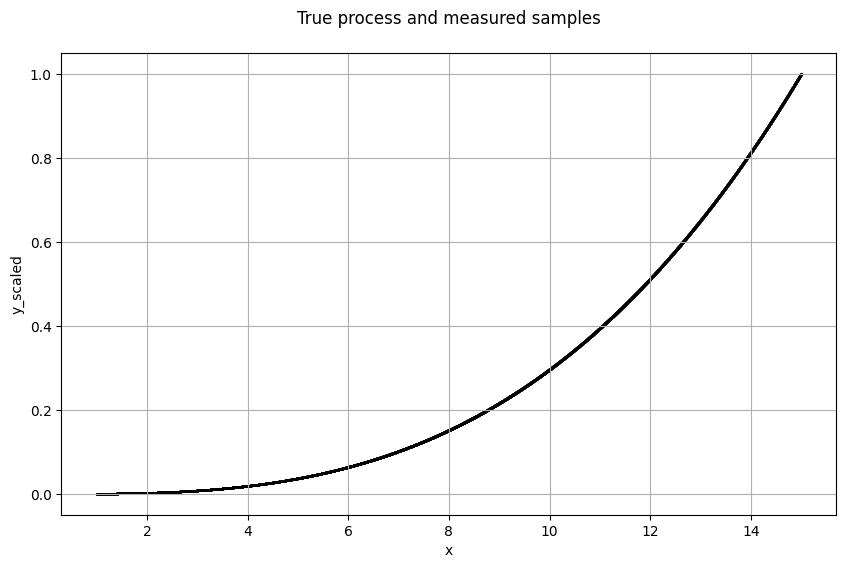

In [8]:

df.plot.scatter('x','y_scaled',title='True process and measured samples\n',
                grid=True,edgecolors=(0,0,0),c='orange',s=0.5,figsize=(10,6))

In [9]:
# Define the activation functions
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def tanh(z): 
    return np.log(z)

def relu(z):
    return np.maximum(0,z)

def leaky_relu(z):
    return np.maximum(0.01*z,z)

def elu(z):
    return np.maximum(0.01*(np.exp(z)-1),z)

def swish(z):
    return z/(1+np.exp(-z))


#define the function to be approximated 
def func_m(m):
    return np.tan(m)+ np.exp(-m) + np.sin(m) 

    
# Define the loss function 

def loss_function(params, y, x, approximation_function, activation_function):
    theta_0, theta_1, theta_2, gamma_1,gamma_2 = params  # Unpack the parameters , layer 
    prediction = theta_0 + approximation_function(gamma_1*activation_function(theta_1*x) + gamma_2*activation_function(theta_2*x))
    return np.mean((y- prediction)**2)  # mean of squared errors


In [10]:

# %%minimize the function 
from scipy.optimize import minimize
np.random.seed(142)  #For reproducibility

# Initial guess for hyperparameters 
initial_guess = [0.0, 1.0, 1.0, 1.0, 0.0]


In [11]:
# %%
result = minimize(loss_function, initial_guess, args=(df['y'], df['x'], func_m, sigmoid))



# Extract the optimal parameters
theta_0_opt, theta_1_opt, theta_2_opt, gamma_1_opt, gamma_2_opt= result.x

print("Optimal theta_0:", theta_0_opt)
print("Optimal theta_1:", theta_1_opt)
print("Optimal gamma_1:", gamma_1_opt)
print("Optimal gamma_1:", theta_2_opt)
print("Optimal gamma_1:", gamma_2_opt)

print("Minimum value of the loss function:", result.fun)



Optimal theta_0: 0.07935947638099558
Optimal theta_1: 1.0004587849357416
Optimal gamma_1: 1.285142059815023
Optimal gamma_1: 1.0
Optimal gamma_1: 0.285142059815023
Minimum value of the loss function: 221039.92412613606


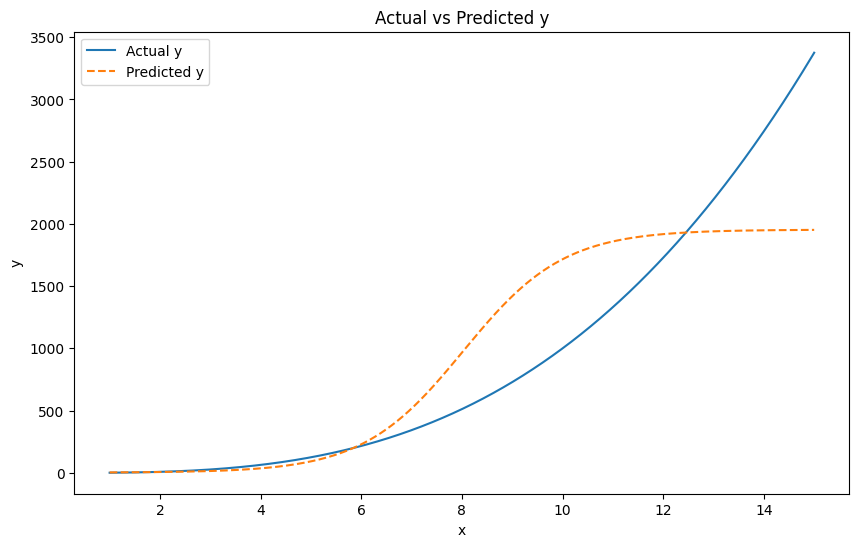

In [12]:
import matplotlib.pyplot as plt

# Calculate predictions
# Plot scaled predictions
prediction_scaled = theta_0_opt+ func_m(gamma_1_opt*sigmoid(theta_1_opt*df['x']) + gamma_2_opt*sigmoid(theta_2_opt*df['x']))
#prediction_original = prediction_scaled * (y_max - y_min) + y_min  # Rescale back to original scale


# Plot y and predictions as line plots against x
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], label='Actual y', linestyle='-', linewidth=1.5)
plt.plot(df['x'], prediction_scaled, label='Predicted y', linestyle='--', linewidth=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted y')
plt.legend()
plt.show()


## Part-2


differential_evolution step 1: f(x)= 606525.1968474359
differential_evolution step 2: f(x)= 606525.1968474359
differential_evolution step 3: f(x)= 486073.37451589125
differential_evolution step 4: f(x)= 486073.37451589125
differential_evolution step 5: f(x)= 434254.79456804285
differential_evolution step 6: f(x)= 434254.79456804285
differential_evolution step 7: f(x)= 434254.79456804285
differential_evolution step 8: f(x)= 434254.79456804285
differential_evolution step 9: f(x)= 434254.79456804285
differential_evolution step 10: f(x)= 392784.2607715681
differential_evolution step 11: f(x)= 392784.2607715681
differential_evolution step 12: f(x)= 392784.2607715681
differential_evolution step 13: f(x)= 260597.13814200036
differential_evolution step 14: f(x)= 260597.13814200036
differential_evolution step 15: f(x)= 260597.13814200036
differential_evolution step 16: f(x)= 260597.13814200036
differential_evolution step 17: f(x)= 260597.13814200036
differential_evolution step 18: f(x)= 260597.

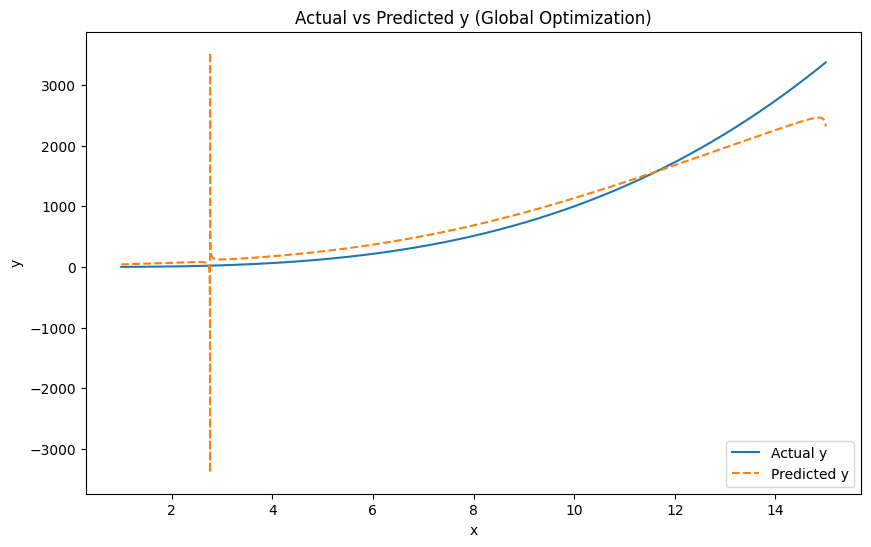

In [13]:
from scipy.optimize import differential_evolution

# Define the parameter bounds for global optimization
bounds = [
    (-10, 10),  # Bounds for theta_0
    (0.1, 10),  # Bounds for theta_1 (avoid zero to prevent division issues)
    (0.1, 10),  # Bounds for theta_2
    (-10, 10),  # Bounds for gamma_1
    (-10, 10),  # Bounds for gamma_2
]

# Perform global optimization using Differential Evolution
result_de = differential_evolution(
    loss_function,
    bounds,
    args=(df['y'], df['x'], func_m, sigmoid),
    strategy='best1bin',
    maxiter=1000,
    popsize=15,
    tol=1e-6,
    seed=142,  # For reproducibility
    disp=True  # Display progress
)

# Extract the optimal parameters
theta_0_opt, theta_1_opt, theta_2_opt, gamma_1_opt, gamma_2_opt = result_de.x

# Print the optimal parameters and minimum loss
print("Optimal theta_0:", theta_0_opt)
print("Optimal theta_1:", theta_1_opt)
print("Optimal theta_2:", theta_2_opt)
print("Optimal gamma_1:", gamma_1_opt)
print("Optimal gamma_2:", gamma_2_opt)
print("Minimum value of the loss function:", result_de.fun)

# Calculate predictions using the optimized parameters
prediction_scaled = (
    theta_0_opt + func_m(
        gamma_1_opt * sigmoid(theta_1_opt * df['x']) + 
        gamma_2_opt * sigmoid(theta_2_opt * df['x'])
    )
)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], label='Actual y', linestyle='-', linewidth=1.5)
plt.plot(df['x'], prediction_scaled, label='Predicted y', linestyle='--', linewidth=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted y (Global Optimization)')
plt.legend()
plt.show()


In [14]:
import numpy as np
from scipy.optimize import minimize

# Number of random initializations
n_starts = 1000
best_loss = float('inf')
best_params = None

# Perform multiple local optimizations
for i in range(n_starts):
    # Generate random initial guesses within reasonable ranges
    initial_guess = np.random.uniform([-10, -10, -10, -10, -10], [10, 10, 10, 10, 10])

    # Run local optimization
    result = minimize(loss_function, initial_guess, args=(df['y'], df['x'], func_m, sigmoid), method='L-BFGS-B')
    
    # Check if this is the best solution so far
    if result.fun < best_loss:
        best_loss = result.fun
        best_params = result.x

# Ensure the best loss is below 1
if best_loss > 1:
    print("Failed to converge to a loss below 1.")
else:
    # Extract the best parameters
    theta_0_opt, theta_1_opt, theta_2_opt, gamma_1_opt, gamma_2_opt = best_params
    print("Best Parameters:", best_params)
    print("Minimum value of the loss function:", best_loss)


C:\Users\niranjan.kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\niranjan.kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


Failed to converge to a loss below 1.


Optimal parameters: [-10.0, 2.637094054696273, 3.5017904781170914, -0.34690450380531246, -5.193709933991868]
Minimum value of the loss function: 1358575.1259300385
Optimal theta_0: -10.0
Optimal theta_1: 2.637094054696273
Optimal theta_2: 3.5017904781170914
Optimal gamma_1: -0.34690450380531246
Optimal gamma_2: -5.193709933991868
Minimum value of the loss function: 59294.35634410956


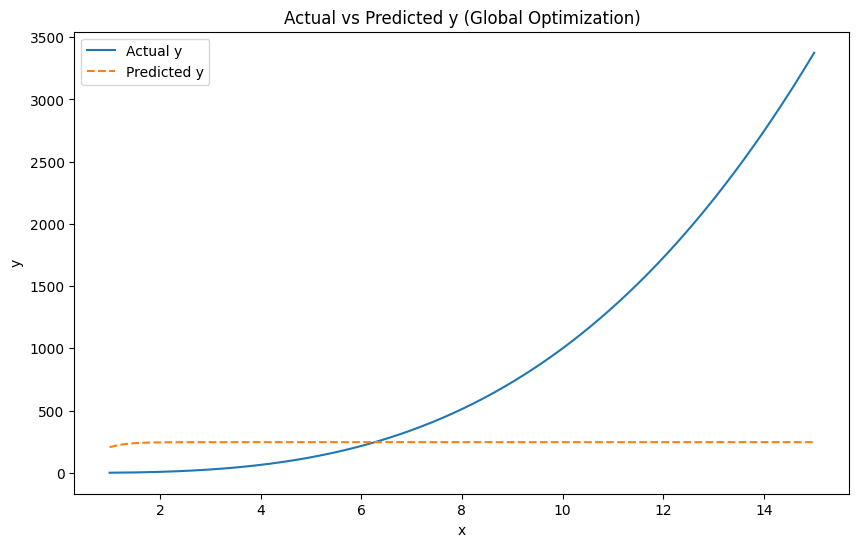

In [15]:
import scipy.optimize as skopt 
from skopt import gp_minimize
from skopt.space import Real

# Define the parameter space
space = [
    Real(-10, 10, name='theta_0'),
    Real(0.1, 10, name='theta_1'),
    Real(0.1, 10, name='theta_2'),
    Real(-10, 10, name='gamma_1'),
    Real(-10, 10, name='gamma_2'),
]

# Wrapper for the loss function to work with gp_minimize
def wrapped_loss(params):
    return loss_function(params, df['y'], df['x'], func_m, sigmoid)

# Perform Bayesian Optimization
result_bo = gp_minimize(
    wrapped_loss,
    dimensions=space,
    n_calls=50,  # Number of evaluations
    random_state=142,
)

# Extract the best parameters
theta_0_opt, theta_1_opt, theta_2_opt, gamma_1_opt, gamma_2_opt = result_bo.x

# Print results
print("Optimal parameters:", result_bo.x)
print("Minimum value of the loss function:", result_bo.fun)
# Print the optimal parameters and minimum loss
print("Optimal theta_0:", theta_0_opt)
print("Optimal theta_1:", theta_1_opt)
print("Optimal theta_2:", theta_2_opt)
print("Optimal gamma_1:", gamma_1_opt)
print("Optimal gamma_2:", gamma_2_opt)
print("Minimum value of the loss function:", result_de.fun)

# Calculate predictions using the optimized parameters
prediction_scaled = (
    theta_0_opt + func_m(
        gamma_1_opt * sigmoid(theta_1_opt * df['x']) + 
        gamma_2_opt * sigmoid(theta_2_opt * df['x'])
    )
)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], label='Actual y', linestyle='-', linewidth=1.5)
plt.plot(df['x'], prediction_scaled, label='Predicted y', linestyle='--', linewidth=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted y (Global Optimization)')
plt.legend()
plt.show()


C:\Users\niranjan.kumar\AppData\Local\Temp\ipykernel_11612\2488029646.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  params[i] = param
C:\Users\niranjan.kumar\AppData\Local\Temp\ipykernel_11612\2488029646.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  params[i] = result.x


Optimal parameters: [1.00000000e+01 7.47388643e-01 2.05248530e+00 1.57044698e+00
 2.53905004e-05]
Minimum value of the loss function: 28119.70038896943
Optimal theta_0: -10.0
Optimal theta_1: 2.637094054696273
Optimal theta_2: 3.5017904781170914
Optimal gamma_1: -0.34690450380531246
Optimal gamma_2: -5.193709933991868
Minimum value of the loss function: 59294.35634410956


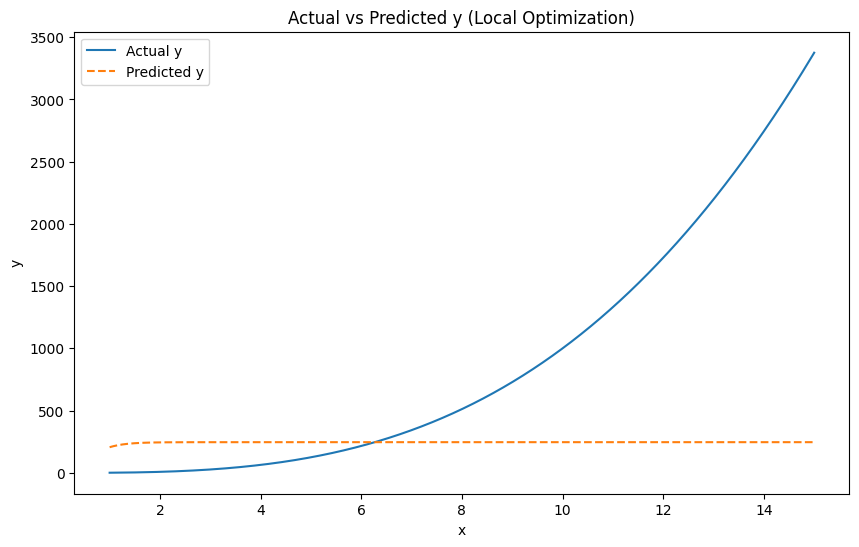

In [16]:
def coordinate_descent(params, max_iters=100, tol=1e-6):
    params = np.array(params)
    loss_prev = float('inf')
    for _ in range(max_iters):
        for i in range(len(params)):
            def partial_loss(param):
                params[i] = param
                return loss_function(params, df['y'], df['x'], func_m, sigmoid)

            result = minimize(partial_loss, params[i], bounds=[(-10, 10)])
            params[i] = result.x
        loss_current = loss_function(params, df['y'], df['x'], func_m, sigmoid)
        if abs(loss_prev - loss_current) < tol:
            break
        loss_prev = loss_current
    return params, loss_prev

# Initial guess
initial_guess = [0.0, 1.0, 1.0, 1.0, 0.0]
params_opt, min_loss = coordinate_descent(initial_guess)

# Print results
print("Optimal parameters:", params_opt)
print("Minimum value of the loss function:", min_loss)

# Print the optimal parameters and minimum loss
print("Optimal theta_0:", theta_0_opt)
print("Optimal theta_1:", theta_1_opt)
print("Optimal theta_2:", theta_2_opt)
print("Optimal gamma_1:", gamma_1_opt)
print("Optimal gamma_2:", gamma_2_opt)
print("Minimum value of the loss function:", result_de.fun)

# Calculate predictions using the optimized parameters
prediction_scaled = (
    theta_0_opt + func_m(
        gamma_1_opt * sigmoid(theta_1_opt * df['x']) + 
        gamma_2_opt * sigmoid(theta_2_opt * df['x'])
    )
)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], label='Actual y', linestyle='-', linewidth=1.5)
plt.plot(df['x'], prediction_scaled, label='Predicted y', linestyle='--', linewidth=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted y (Local Optimization)')
plt.legend()
plt.show()


Optimal parameters: [-1.10990801e-03  7.49102454e-01  1.03671225e+00  1.56895646e+00
  1.51575373e-03]
Minimum value of the loss function: 29560.292816821722
Optimal theta_0: -0.0011099080078376285
Optimal theta_1: 0.7491024536575324
Optimal theta_2: 1.0367122505746746
Optimal gamma_1: 1.5689564609560134
Optimal gamma_2: 0.0015157537296577
Minimum value of the loss function: 59294.35634410956


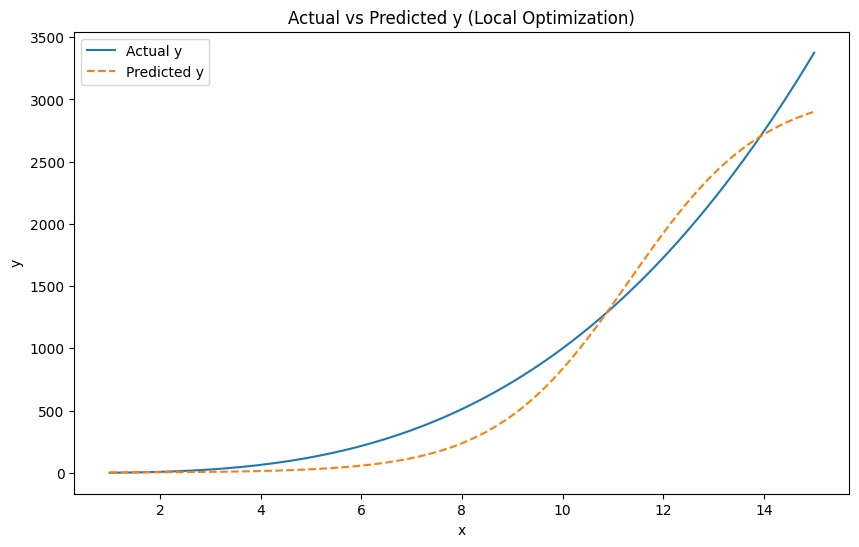

In [17]:
result_nm = minimize(
    loss_function, 
    initial_guess, 
    args=(df['y'], df['x'], func_m, sigmoid), 
    method='Nelder-Mead'
)

# Extract results
theta_0_opt, theta_1_opt, theta_2_opt, gamma_1_opt, gamma_2_opt = result_nm.x
print("Optimal parameters:", result_nm.x)
print("Minimum value of the loss function:", result_nm.fun)
# Print the optimal parameters and minimum loss
print("Optimal theta_0:", theta_0_opt)
print("Optimal theta_1:", theta_1_opt)
print("Optimal theta_2:", theta_2_opt)
print("Optimal gamma_1:", gamma_1_opt)
print("Optimal gamma_2:", gamma_2_opt)
print("Minimum value of the loss function:", result_de.fun)

# Calculate predictions using the optimized parameters
prediction_scaled = (
    theta_0_opt + func_m(
        gamma_1_opt * sigmoid(theta_1_opt * df['x']) + 
        gamma_2_opt * sigmoid(theta_2_opt * df['x'])
    )
)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], label='Actual y', linestyle='-', linewidth=1.5)
plt.plot(df['x'], prediction_scaled, label='Predicted y', linestyle='--', linewidth=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted y (Local Optimization)')
plt.legend()
plt.show()


Training MSE: 4.5705
Test MSE: 4.4632


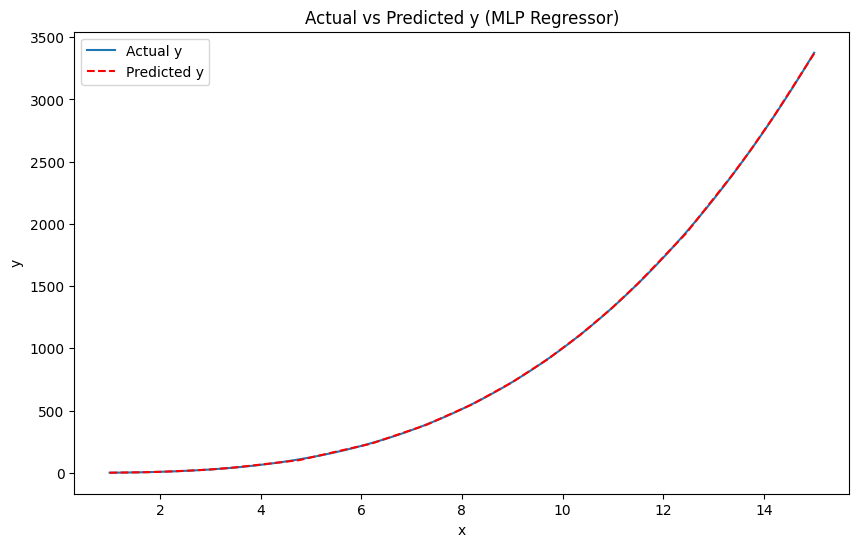

In [18]:
#Now train a machine learning to do the same 
# %% Import necessary libraries
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X = df[['x']].values  # Feature
y = df['y'].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %% Train the machine learning model
# Define the MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', 
                         learning_rate_init=0.001, max_iter=10000, random_state=42)

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# %% Evaluate the model
# Predict on both train and test data
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# %% Generate predictions for the full dataset
df['y_pred'] = mlp_model.predict(X)

# %% Plot actual vs. predicted y
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], label='Actual y', linestyle='-', linewidth=1.5)
plt.plot(df['x'], df['y_pred'], label='Predicted y', linestyle='--', linewidth=1.5, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted y (MLP Regressor)')
plt.legend()
plt.show()


Training MSE: 0.0680
Test MSE: 0.2018


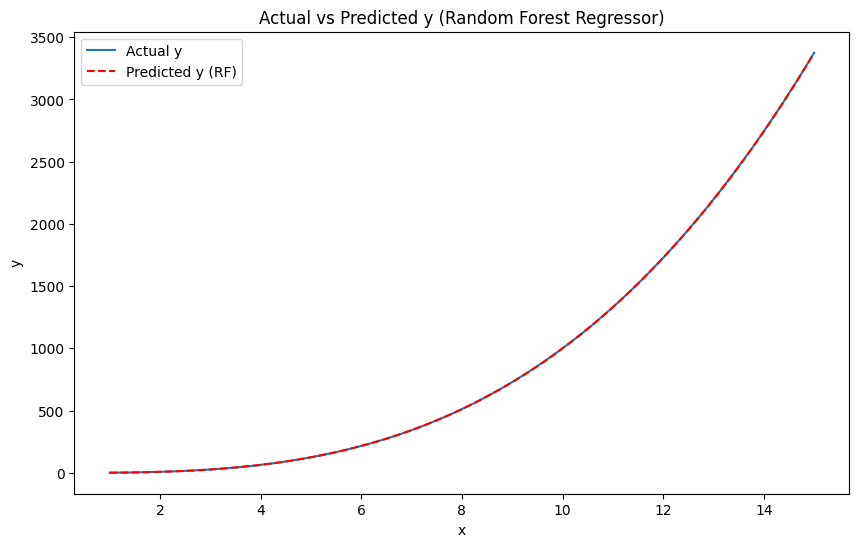

In [19]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X = df[['x']].values  # Feature
y = df['y'].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Generate predictions for the entire dataset
df['y_pred_rf'] = rf_model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], label='Actual y', linestyle='-', linewidth=1.5)
plt.plot(df['x'], df['y_pred_rf'], label='Predicted y (RF)', linestyle='--', linewidth=1.5, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual vs Predicted y (Random Forest Regressor)')
plt.legend()
plt.show()
